In [1]:
from scipy.spatial.distance import euclidean as distance
import math, random
import matplotlib.pyplot as plt

inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

### tree 형태의 클러스터

In [2]:
def is_leaf(cluster):
    return len(cluster) == 1

def get_children(cluster):
    if is_leaf(cluster):
        raise TypeError("a leaf cluster has no children")
    else:
        return cluster[1]

def get_values(cluster):
    # 잎이면 잎의 value, 병합된 군집이면 군집 내 모든 잎의 value를 리턴
    if is_leaf(cluster):
        return cluster # is already a 1-tuple containing value
    else:
        return [value
                for child in get_children(cluster)
                for value in get_values(child)]


In [3]:
def cluster_distance(cluster1, cluster2, distance_agg = min):
    # cluster1내 모든 원소와 cluster2내 모든 원소 사이의 거리 중 min을 리턴
    return distance_agg([distance(input1, input2)
                        for input1 in get_values(cluster1)
                        for input2 in get_values(cluster2)])

def get_merge_order(cluster):
    if is_leaf(cluster):
        return float('inf')
    else:
        return cluster[0] # cluster = (병합순서, [cluster1, cluster2])


In [4]:
def bottom_up_cluster(inputs, distance_agg=min):
    # [(a1, ),(a2, ), (a3, ), ...] 형태의 군집들
    clusters = [(input,) for input in inputs]

    while len(clusters) > 1:
        # 가장 가까운 두 군집을 찾자
        c1, c2 = min([(cluster1, cluster2) for i, cluster1 in enumerate(clusters) for cluster2 in clusters[:i]],
                       key=lambda p: cluster_distance(p[0], p[1], distance_agg))
             # [ ((a1,),(a2,)), ((a1,),(a3,)), ((a2,),(a3,)), ((a1,),(a4,)), ((a2,),(a4,)), ((a3,),(a4,)), ...]
             # p = ((a1,),(a2,))
            
        # 가장 가까운 두 군집을 전체 군집 리스트에서 없애고
        clusters = [c for c in clusters if c != c1 and c != c2]

        # (병합순서 = 남은 군집 개수) 로 병합
        merged_cluster = (len(clusters), [c1, c2])

        # 병합된 군집 추가
        clusters.append(merged_cluster)

    # when there's only one cluster left, return it
    return clusters[0]


base_cluster = bottom_up_cluster(inputs)
print(base_cluster)

(0, [(1, [(3, [(14, [(18, [([19, 28],), ([21, 27],)]), ([20, 23],)]), ([26, 13],)]), (16, [([11, 15],), ([13, 13],)])]), (2, [(4, [(5, [(9, [(11, [([-49, 0],), ([-46, 5],)]), ([-41, 8],)]), ([-49, 15],)]), ([-34, -1],)]), (6, [(7, [(8, [(10, [([-22, -16],), ([-19, -11],)]), ([-25, -9],)]), (13, [(15, [(17, [([-11, -6],), ([-12, -8],)]), ([-14, -5],)]), ([-18, -3],)])]), (12, [([-13, -19],), ([-9, -16],)])])])])


In [5]:
def generate_clusters(base_cluster, num_clusters):
    # start with a list with just the base cluster
    clusters = [base_cluster]

    # as long as we don't have enough clusters yet...
    while len(clusters) < num_clusters:
        # 가장 마지막으로 병합된 군집을 선택
        next_cluster = min(clusters, key = get_merge_order)
        # 그 군집을 전체군집리스트에서 없애고
        clusters = [c for c in clusters if c != next_cluster]
        # 그 군집을 풀어서 전체군집리스트에 추가
        clusters.extend(get_children(next_cluster))

    # once we have enough clusters...
    return clusters

In [6]:
print("three clusters, min:")
base_cluster = bottom_up_cluster(inputs, min)
three_clusters_min =  generate_clusters(base_cluster, 3)
for cluster in three_clusters_min:
    print(get_values(cluster))


print("\nthree clusters, max:")
base_cluster = bottom_up_cluster(inputs, max)
three_clusters_max =  generate_clusters(base_cluster, 3)
for cluster in three_clusters_max:
    print(get_values(cluster))

three clusters, min:
[[-49, 0], [-46, 5], [-41, 8], [-49, 15], [-34, -1], [-22, -16], [-19, -11], [-25, -9], [-11, -6], [-12, -8], [-14, -5], [-18, -3], [-13, -19], [-9, -16]]
[[19, 28], [21, 27], [20, 23], [26, 13]]
[[11, 15], [13, 13]]

three clusters, max:
[[11, 15], [13, 13], [26, 13], [19, 28], [21, 27], [20, 23]]
[[-41, 8], [-49, 15], [-49, 0], [-46, 5], [-34, -1]]
[[-11, -6], [-12, -8], [-14, -5], [-18, -3], [-22, -16], [-19, -11], [-25, -9], [-13, -19], [-9, -16]]


### 군집사이의 최소거리를 minimize

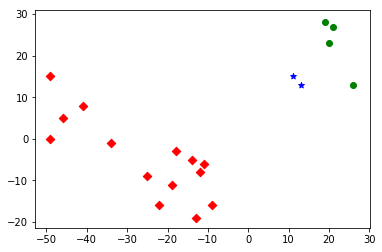

In [7]:
three_clusters = [get_values(cluster) for cluster in three_clusters_min]
for i, cluster, marker, color in zip([1,2,3],
                                    three_clusters,
                                    ['D','o','*'],
                                     ['r','g','b']):
    xs, ys = zip(*cluster)
    plt.scatter(xs, ys, color=color, marker=marker)
plt.show()

### 군집사이의 최대거리를 minimize

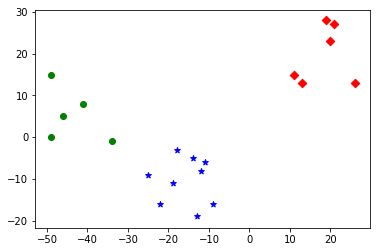

In [8]:
three_clusters = [get_values(cluster) for cluster in three_clusters_max]
for i, cluster, marker, color in zip([1,2,3],
                                    three_clusters,
                                    ['D','o','*'],
                                     ['r','g','b']):
    xs, ys = zip(*cluster)
    plt.scatter(xs, ys, color=color, marker=marker)
plt.show()